## Structure Function (Error Bar) Metric

**Author(s):** Weixiang Yu & Gordon Richards
<br>**Last updated:** 03/12/2021
<br>**Short description:**
This notebook implements the structure function metric derived below as a proxy to examine how well can we constrain the structure function given a specific cadence in a model independent manner. This metric depends on the level of photometric uncertainty and the number of observations in each log($\Delta t$) bin. 

### The SF Error Metric (smaller is better)

The following derivation shows how we obtain the error bar of the empirical structure function at each $\Delta t$ bin. The dependence on the intrinsic variability of the source (or a model) doesn't play a role if we are only to make differential comparisons between different cadence simulations. 

A final (one number) metric can be obtained by adding up the error bars at each $\Delta t$ bin. Emphasis on particular timescales can be realized by assigning different weights to each bin while computing the sum (defaults to equal weights). Again, we can ignore the term solely depending the auto-covariance structure of the source/model while computing the sum as long as we do the same for every cadence simulation tested. It is hard to obtain such a metric for log($\mathrm{SF}$) as it will inevitably depend on the value of $\mathrm{SF}$, making the metric model dependent.

#### Derivation:
##### __Define:__
>1. $\mathrm{SF}^{2} = \frac{1}{n} \sum \ (m_{i} - m_{j})^{2} $ (yes, no noise subtraction, only the simplest form)
2. $u^{2}(x) \equiv$ the uncertainty squared of variable $x$
3. $u^{2}(x^{2}) = 2x^{2}[u^{2}(x) + 1]$
4. $\mathrm{SF} \equiv \mathrm{SF}\ (\Delta t)$
<br>

$u^{2}(\mathrm{SF^{2}}) = 2*\mathrm{SF^{2}}[u^{2}(\mathrm{SF}) + 1]$

$\quad\quad\quad = \frac{1}{n} \sum u^{2}[(m_{i} - m_{j})^{2}]$ ($m_{i}, m_{j}$ are the observed magnitudes in a pair)

$\quad\quad\quad = \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[u^{2}(m_{i} - m_{j}) + 1]$

$\quad\quad\quad = \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[u^{2}(m_{i}) + u^{2}(m_{j}) - 2*cov(\Delta t)+ 1]$ ($u^{2}(m_{i})$ = ${\sigma}_{i}^{2}$, where ${\sigma}_{i}$ is the photometric error of $m_{i}$)

$\quad\quad\quad = \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[{\sigma}_{i}^{2} + {\sigma}_{j}^{2} - 2*cov(\Delta t) + 1]$ ($cov(\Delta t)$ is the auto-covariance.)

$\quad\quad\quad \approx \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[2*\mu_{\sigma_{i}^{2}} + 2*\sqrt{\mathrm{Var}(\sigma_{i}^{2})/n} - 2*cov(\Delta t)+ 1]$ ($\mu_{\sigma^{2}}$ is the median of all $\sigma_{i}^{2}$)

$\quad\quad\quad = 2*\mathrm{SF}^{2}\,[2*\mu_{\sigma_{i}^{2}} + 2*\sqrt{\mathrm{Var}(\sigma_{i}^{2})/n} - 2*cov(\Delta t)+ 1]$ ($n$ is the number pairs at this $\Delta t$ bin)

=> $[u^{2}(\mathrm{SF}) + 1] = [2*\mu_{\sigma_{i}^{2}} + 2*\sqrt{\mathrm{Var}(\sigma_{i}^{2})/n} - 2*cov(\Delta t)+ 1]$

=> $u^{2}(\mathrm{SF}) = 2*\mu_{\sigma_{i}^{2}} + 2*\sqrt{\mathrm{Var}(\sigma_{i}^{2})/n} - 2*cov(\Delta t)$

##### __The definition of each term in above equation:__
The above derivation demonstrates how to compute the error bar on the struture function at a fixed $\Delta t$. That is, the error bar is simply $\sqrt{u^2(\mathrm{SF})}$. $\mu_{\sigma^{2}}$ is the median of __ALL__ $\sigma_{i}^{2}$ (not just from those in the pairs found at a paritcular $\Delta t$ bin). $\mathrm{Var}(\sigma_{i}^{2})$ is the variance of __ALL__ $\sigma_{i}^{2}$, in the implementation below we use the standard deviation converted from MAD (median absolute deviation) to eliminate the effect of strong outliers. $n$ is the number of pairs of observations at each $\Delta t$ bin. $cov(\Delta t)$ is the true source autocovariance (or that of the assumed model).

##### __Scaling Relationship:__
At a paritcular $\Delta t$, the square of the error bar on the structure function ($u^{2}(\mathrm{SF})$) should scale linearly with mean ($\mu_{\sigma^{2}}$) and the standard deviation ($\sqrt{\mathrm{Var}(\sigma_{i}^{2})}$) of the square of the photometric error ($\sigma_{i}^{2}$), and scale inverse proportionally with the square root of the number of pairs ($\sqrt{n}$). The dependene on the intrinsic covariacne structure ($cov(\Delta t)$) can be ignored if we only care about differential comparisons.

#### Summarizing over all $\Delta t$ bins:
In terms of making differential comparisons, regardless of what the true variability model (parameterized by $cov(\Delta t)$ is, we can simply sum up all the terms in  $u^{2}(\mathrm{SF})$ without $cov(\Delta t)$ across all $\Delta t$ bins as the final metric. If certain timescales need to be treated with higher priority, a weighted sum can be used as well. 

#### Some Discussions
##### 1. Do the metric results evaluated on different opsims make sense?
I think they do provided how the metric is defined in the first place. For example, we would expect the 'dcr' family to give relatively higher metric values (larger error bars) given that some low airmass visits are replaced with high airmass ones. In addition, we can expect the 'u60' family to give relatively smaller SF error bars in 'g' band, since 60 seconds exposure in u band results in more 'g' band visits (using the time saved from less u band readout/slew) and larger 'g' band depth (smaller photometric error). In general, most cadences give similar results.
##### 2. An extreme case: All observations conducted in 1 year (in fact ~ 180 days).
This kind of cadence will result in zero pairs at large $\Delta t$ which is detrimental for AGN variability science. In the metric class definition below, we set $n=0.01$ in $\Delta t$ bins of zero pairs to avoid divergence and at the same time penalize for any timescale that can't be probe. A simple experiment given at the end of this notebook (Section 4.) shows that an extreme rolling cadence will results in a metric values that is ~2.5 times (0.4 offset in log10) larger than the metric value of a vanilla baseline-like cadence, which is large enough to make such an extreme rolling cadence a strong outlier.

#### Table of Contents
- [Metric class](#the_metric): The Python class implementing this metric.
- [Run on multiple opsims](#run_multiple): Run 'SFErrorMetric' on a total of 20 opsims.
- [View/Compare the result](#view_multiple): Plot/compare the results.
- [Extreme Vs. Baseline](#extreme_vs_baseline): A simple experiment to test if we can catch the detrimental extreme rolling cadence.

### 0. Software Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import glob
import os

In [2]:
# automatically extract username
your_username = os.getcwd().split('/')[5]
print(f'Your automatically extracted username is: {your_username}.'
        '\nIf it is incorrect, please mannually reset it.')

Your automatically extracted username is: ywx649999311.
If it is incorrect, please mannually reset it.


##### Import the sims_maf modules needed.

In [3]:
# import custom stacker from script
from AGNStacker import MagErrStacker

# import lsst.sim.maf moduels modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
from lsst.sims.maf.stackers import BaseStacker
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

# import convenience functions
from opsimUtils import *

<a id='the_metric'><a>
### 1. The Metric
#### 1.1 Metric Class

In [4]:
from lsst.sims.maf.metrics import BaseMetric
from astropy.stats import mad_std

class SFErrorMetric(BaseMetric):
    """Structure Function (SF) Uncertainty Metric. Developed on top of LogTGaps"""
    
    def __init__(self, mag, band, timesCol='observationStartMJD', allGaps=True, units='mag', 
             maf = False, bins=np.logspace(0, np.log10(3650), 11), weight=np.full(10, 0.1), **kwargs):
        """Init function for metric class.
        
        Args:
            mag(float): The magnitude at which to evaluate this metric.
            band(str): Using observations from which filter, one of 'u', 'g', 'r', 'i', 'z', 'y'.
            timesCol(str): Time column name. Defaults to "observationStartMJD".
            allGaps(bool): Whether to use all gaps (between any two pairs of observations). 
                If False, only use consecutive paris. Defaults to True.
            units(str): Unit of this metric. Defaults to "mag".
            maf(bool): Whether to use the original method from MAF to compute delta_t; if False, use 
                the vectorized method. Defaults to False.
            bins(object): An array of bin edges. Defaults to "np.logspace(0, np.log10(3650), 11)" for a 
                total of 10 bins.
            weight(object): The weight assigned to each delta_t bin for deriving the final metric. 
                Defaluts to "weight=np.full(10, 0.1)".
            
        """
        
        # Assign metric parameters to instance object
        self.timesCol = timesCol
        self.allGaps = allGaps
        self.maf = maf
        self.bins = bins
        self.weight=weight
        self.metricName = f'SFError_{mag}_{band}'
        super(SFErrorMetric, self).__init__(col=[self.timesCol, 'visitExposureTime'], 
                                            metricName=self.metricName, units=units, **kwargs)

        
    def run(self, dataSlice, slicePoint=None):
        """Code executed at each healpix pixel to compute the metric"""
        
        # remove extremely short exposures
        dataSlice = dataSlice[dataSlice['visitExposureTime'] > 5.1]
        
        # If the total number of visits < 2, mask as bad pixel
        if dataSlice.size < 2:
            return self.badval
        
        # sort data by time column
        times = np.sort(dataSlice[self.timesCol]) 
        
        # check if use all gaps (between any pairs of observations)
        if self.allGaps:
            
            # check if using original MAF method to compute time gaps
            if not self.maf:
                # use the vectorized method
                dt_matrix = times.reshape((1, times.size)) - times.reshape((times.size, 1))
                dts = dt_matrix[dt_matrix > 0].flatten().astype(np.float16)
            else:
                # use the original method --> loop through each observations
                allDiffs = []
                for i in np.arange(1,times.size,1):
                    allDiffs.append((times-np.roll(times,i))[i:])
                dts = np.concatenate(allDiffs).astype(np.float16)
        else:
            dts = np.diff(times)
        
        # bin delta_t using provided bins; if zero pair found at any delta_t bin, 
        # replace 0 with 0.01 to avoid the exploding 1/sqrt(n) term in this metric
        result, bins = np.histogram(dts, self.bins)
        new_result = np.where(result > 0, result, 0.01)
        
        # compute photometric_error^2 population variance and population mean
        # note that variance is replaced by median_absolute_deviate^2
        # mean is replaced by median in this implementation to make it robust to 
        # outliers in simulations (e.g., dcr simulations)
        err_var = dataSlice['magErr']**2
        err_var_mu = np.median(err_var)
        err_var_std = mad_std(err_var)
        
        # compute SF error
        sf_var_dt = 2*(err_var_mu + err_var_std/np.sqrt(new_result)) 
        sf_var_metric = np.sum(sf_var_dt * self.weight)
        
        return sf_var_metric

#### 1.2 Run \& Test (on a single point)

In [5]:
#Read in an opSim (in this case "baseline_v1.4_10yrs.db")
opsdb1 = db.OpsimDatabase('/home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db')
outDir = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/tmp/SF/031221/'.format(your_username)
resultsDb = db.ResultsDb(outDir=outDir)

In [6]:
sf_metric = SFErrorMetric(22, 'g') # default configs
slicer = slicers.UserPointsSlicer(ra=[-10], dec=[-10])
constraint = 'filter = "g"'
testmb = metricBundles.MetricBundle(sf_metric, slicer, constraint, \
                                        stackerList=[MagErrStacker(22)])

In [7]:
testbd = {'pointSFErr': testmb}
group = metricBundles.MetricBundleGroup(testbd, opsdb1, outDir=outDir, resultsDb=resultsDb)
group.runAll()

Querying database SummaryAllProps with constraint filter = "g" for columns ['visitExposureTime', 'fieldDec', 'fiveSigmaDepth', 'filter', 'fieldRA', 'observationStartMJD']
Found 223871 visits
Running:  ['pointSFErr']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [8]:
print(f'Combine SF Metric at gmag=22 at the specificed location is: {testmb.metricValues.data[0]}')

Combine SF Metric at gmag=22 at the specificed location is: 0.0011429552193973939


#### 1.3 Run test over the whole sky

In [9]:
slicer2 = slicers.HealpixSlicer(nside=32)
constraint2 = 'filter = "g"'
constraint2 += ' and note not like "DD%"'

skymb = metricBundles.MetricBundle(sf_metric, slicer2, constraint2, \
                                        stackerList=[MagErrStacker(22)])

skydb = {'skySFErr': skymb}

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [10]:
group2 = metricBundles.MetricBundleGroup(skydb, opsdb1, outDir=outDir, resultsDb=resultsDb)
group2.runAll()

Querying database SummaryAllProps with constraint filter = "g" and note not like "DD%" for columns ['visitExposureTime', 'fieldDec', 'fiveSigmaDepth', 'filter', 'fieldRA', 'observationStartMJD']
Found 211754 visits
Running:  ['skySFErr']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "filter = "g" and note not like "DD%"" constraint now.


/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maf/2.13.0.sims-24-gbe21ed04+1/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 1937 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.00205082  dipole: lon: -52.6171, lat: 80.8791, amp: 0.00144407
Plotting complete.


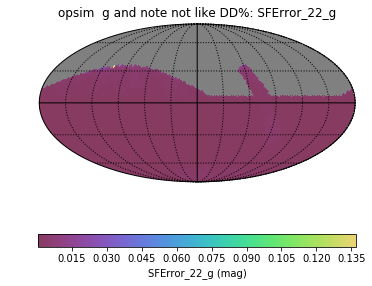

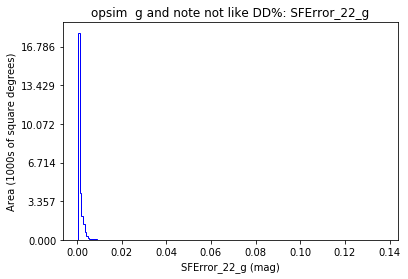

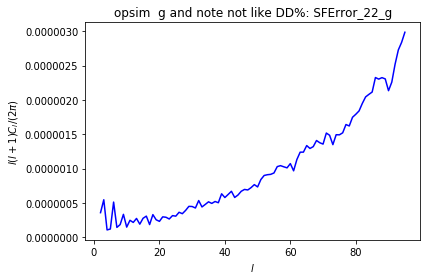

In [11]:
group2.plotAll(closefigs=False, savefig=False)

#### Things Need More Discussion:
1. What to do when the number pairs at a delta_t bin is zero, right now, the zero is substituted with 0.1 to avoid exploding term of 1/sqrt(n). Note that we can adjust the weight of each delta_t bin to emphasize different timescales.

<a id='run_multiple'><a>
### 2. Run on one cadence from each family in FBS 1.5 and make differential comparison 

If you want to run metric on all or a lot of cadence simulation, you can run them in parallel using `Dask`
You can install `Dask` with: 
```
conda install dask distributed -c conda-forge
```
or:
```
python -m pip install dask distributed --upgrade
```

In [12]:
# import dask and create client
from dask.distributed import Client
client = Client(n_workers=16)
client

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Client Scheduler: tcp://127.0.0.1:32980,Cluster Workers: 16 Cores: 16 Memory: 257.77 GB


In [13]:
if your_username == '': # do NOT put your username here, put it in the cell at the top of the notebook.
    raise Exception('Please provide your username!  See the top of the notebook.')

dbDir = '/home/idies/workspace/lsst_cadence/FBS_1.5/'
outDir = f'/home/idies/workspace/Temporary/{your_username}/LSST_MAF/wy/Var/SF/031221/ResultDBs/'
metricDataPath = f'/home/idies/workspace/Temporary/{your_username}/LSST_MAF/wy/Var/SF/031221/MetricData/'

if not os.path.exists(os.path.abspath(outDir)):
    os.makedirs(os.path.abspath(outDir))
    
if not os.path.exists(os.path.abspath(metricDataPath)):
    os.makedirs(os.path.abspath(metricDataPath))

In [14]:
dbRuns = show_opsims(dbDir)
dbRuns[0:5] # only show first 5 opsims

['dcr_nham1_ugri_v1.5_10yrs',
 'rolling_mod6_sdf_0.20_v1.5_10yrs',
 'wfd_depth_scale0.95_noddf_v1.5_10yrs',
 'u60_v1.5_10yrs',
 'footprint_stuck_rollingv1.5_10yrs']

#### 2.1 Select one OpSim from each family

Where family is indicated by the first part (before the 1st underscore) of the DB file name

In [15]:
dbFamil = [run.split('_')[0] for run in dbRuns]
dfRuns = pd.DataFrame({'run':dbRuns, \
                       'runFamil':dbFamil}).sort_values(by='runFamil').reset_index(drop=True)
dfRuns.head()

,run,runFamil
0,agnddf_v1.5_10yrs,agnddf
1,alt_dust_v1.5_10yrs,alt
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,alt
3,baseline_samefilt_v1.5_10yrs,baseline
4,baseline_v1.5_10yrs,baseline


In [16]:
# pick one run from each family
dfRunPick = dfRuns.drop_duplicates(subset=['runFamil']).reset_index(drop=True)
dfRunPick

,run,runFamil
0,agnddf_v1.5_10yrs,agnddf
1,alt_dust_v1.5_10yrs,alt
2,baseline_samefilt_v1.5_10yrs,baseline
3,bulges_cadence_bs_v1.5_10yrs,bulges
4,daily_ddf_v1.5_10yrs,daily
5,dcr_nham1_ug_v1.5_10yrs,dcr
6,descddf_v1.5_10yrs,descddf
7,filterdist_indx5_v1.5_10yrs,filterdist
8,footprint_no_gp_northv1.5_10yrs,footprint
9,goodseeing_gri_v1.5_10yrs,goodseeing


If you want to run all the runs, use "dfRuns".  If you are happy just looking at an example from each family, then use "dfRunPick" below.

In [17]:
# two dictionary are returned by the following function, 
# One (opSimDbs) is a dictionary storing all database objects
# Another (resultDbs) is a dictionary consist of the objects directing MAF where to save metric metadata
# Both dictionaries are indexed by OpSim run names
# opSimDbs, resultDbs = connect_dbs(dbDir, outDir, dbRuns=dfRunPick.run.values)

#### 2.2 Declare metrics to for gmag = [22, 24]

We pick a few magnitudes to test this metric (in g and u bands). 
<!-- The corresponding u-band (for one of the gmags) magnitude is obtained based on a typical quasar u-g color of 0.15 -->

In [18]:
bundleDict = {}
for gmag in [22, 24]:
    
    # declare metric, slicer and sql contraint
    sf_metricG = SFErrorMetric(gmag, 'g')
    slicer = slicers.HealpixSlicer(nside=64)
    constraintG = 'filter = "g"'
    constraintG += ' and note not like "DD%"'
    constraintG += ' and proposalId = 1'
    
    # make a bundle
    SF_mbG = metricBundles.MetricBundle(sf_metricG, slicer, constraintG, stackerList=[MagErrStacker(gmag)])
    summaryMetrics = [metrics.MedianMetric(), metrics.MeanMetric(), metrics.RmsMetric()]
    SF_mbG.setSummaryMetrics(summaryMetrics)
    
    # declare u band metric
    umag = gmag
    sf_metricU = SFErrorMetric(umag, 'u')
    constraintU = 'filter = "u"'
    constraintU += ' and note not like "DD%"'
    constraintU += ' and proposalId = 1'
    
    # make a bundle
    SF_mbU = metricBundles.MetricBundle(sf_metricU, slicer, constraintU, stackerList=[MagErrStacker(umag)])
    SF_mbU.setSummaryMetrics(summaryMetrics)

    # put into dict
    bundleDict[sf_metricG.metricName] = SF_mbG
    bundleDict[sf_metricU.metricName] = SF_mbU

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


#### 2.3 Loop over all OpSims in dbDir and run MAF
While constructing a metricBundleGroup from a dictionary (the cell below), you will need to provide the path to a directory (`metricDataPath` in the cell below) where you would like to store the metric data (this is **DIFFERENT** than path to the metric data, `outDir`). To construct metricbundles for plotting and further analysis, this path will be needed.

__Note:__ The code the cell below is deprecated since the dask version is much faster, but it is left here for reference. 

In [19]:
# # below I am only going to run metrics on the first five opsims
# for run in dbRuns[0:3]:
#     # must set run name for each opSim to store metric data into
#     # separate files
#     print(f'Running metrics on: {run}')
#     print('*************************************')
#     for key in bundleDict:
#         bundleDict[key].setRunName(run)
        
#     metricGroup = metricBundles.MetricBundleGroup(bundleDict,\
#                     opSimDbs[run], metricDataPath, resultDbs[run], verbose=False)
#     metricGroup.runAll()

#### 2.4 Run them in parallel with Dask (installing Dask.distributed is required)

Install with: 
```
conda install dask distributed -c conda-forge
```

or:

```
python -m pip install dask distributed --upgrade
```

In [20]:
# define function to run MAF on one opsim which is easily parallelziable. 
def run_mg(run, bundleDict, dbDir, outDir, metricDataPath):
    """
    Function to run pre-defined MAF metrics on one OpSim. 
    
    Args:
        run (str): The OpSim cadence run name.
        bundleDict (dict): A dictionary of MAF metrics.
        dbDir (str): The path to the OpSim databases.
        outDir (str): The path to the resultdb databases.
        metricDataPath (str): The path to the actual metric data (.npz files). 
    """
    for key in bundleDict:
        bundleDict[key].setRunName(run)
    
    # init connection given run name
    opSimDb, resultDb = connect_dbs(dbDir, outDir, dbRuns=[run])
    # make a group
    metricGroup = metricBundles.MetricBundleGroup(bundleDict, opSimDb[run], metricDataPath, \
                                                  resultDb[run], verbose=False)
    metricGroup.runAll()


# %%time
rt = []

# loop over all opsims to evaluate and submite task to dask scheduler
for run in dfRunPick.run.values:
    r = client.submit(run_mg, run, bundleDict, dbDir, outDir, metricDataPath)
    rt.append(r)
    
# collect result
result = client.gather(rt)

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/distributed/worker.py:3101: UserWarning: Large object of size 2.38 MB detected in task graph: 
  ('agnddf_v1.5_10yrs', {'SFError_22_g': <lsst.sims. ... 1/MetricData/')
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s)


<a id='view_multiple'><a>
### 3. Take a peek at the distribution of the metrics
#### 3.1 Import metric data & Check metricBundle keys

In [21]:
# import metric evaluations
bundleDicts = {}
resultDbPath = outDir

resultDbsView = getResultsDbs(resultDbPath)
for runName in resultDbsView:
    bundleDicts[runName] = bundleDictFromDisk(resultDbsView[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [22]:
# Check keys
dbRuns = list(resultDbsView.keys())
bd_keys = list(bundleDicts[dbRuns[1]].keys())
print(bd_keys)

[(1, 'SFError_22_g'), (2, 'SFError_24_g'), (3, 'SFError_22_u'), (4, 'SFError_24_u')]


#### 3.2 Histograms
Histogram of DCR slope precision for gmag in [20, 22, 24]

In [23]:
# return median metric data
def get_median(mb):
    
    mask = mb.metricValues.mask
    data = mb.metricValues.data[~mask]
    data = data[~(np.isnan(data) | np.isinf(data))]
    
    return np.median(data)

# get the median values from all opsims 
# for normaliation in plotting
def get_metric_medians(key, bd, func):
    
    mds = []
    for run in bd:
        keys = [*bd[run].keys()]
        run_key = [elem for elem in keys if elem[1] == key[1]][0]
        mds.append(func(bd[run][run_key]))

    return mds

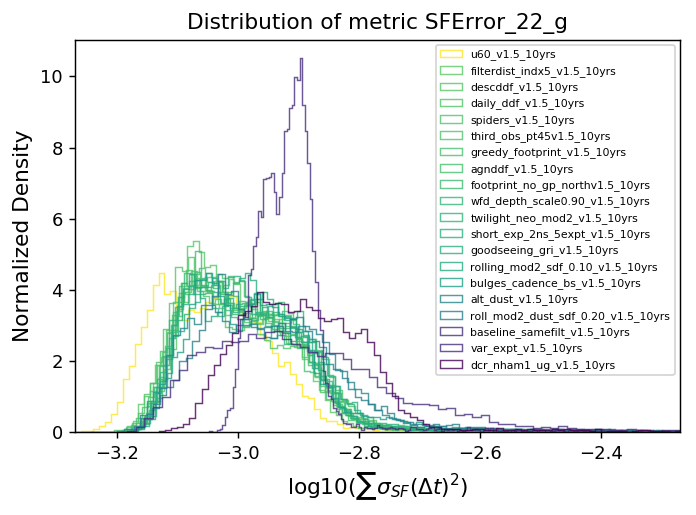

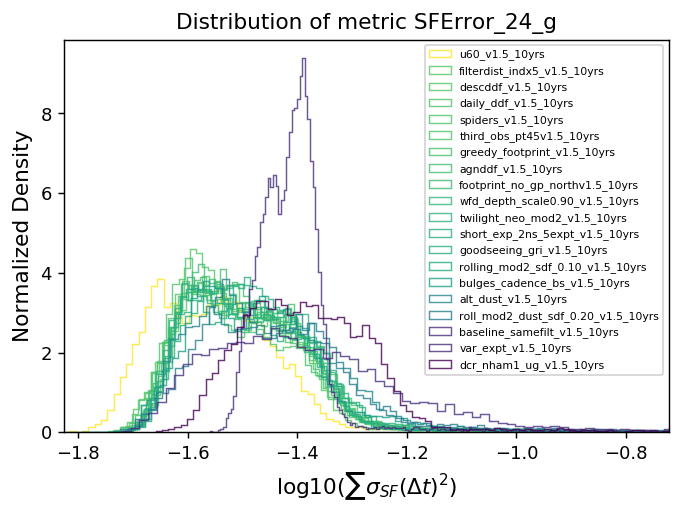

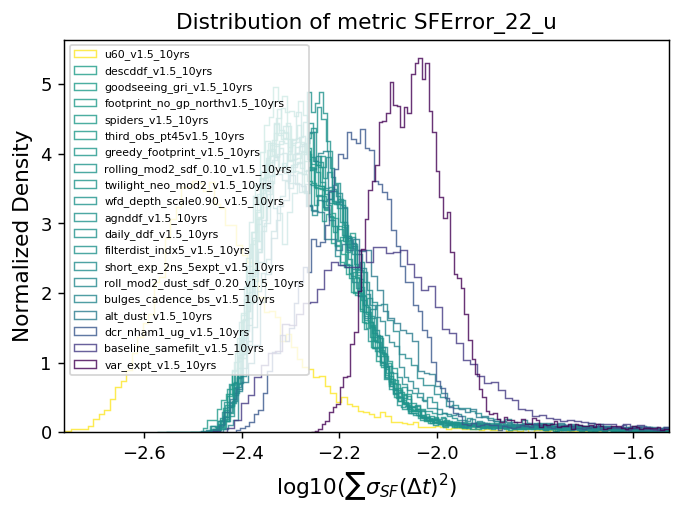

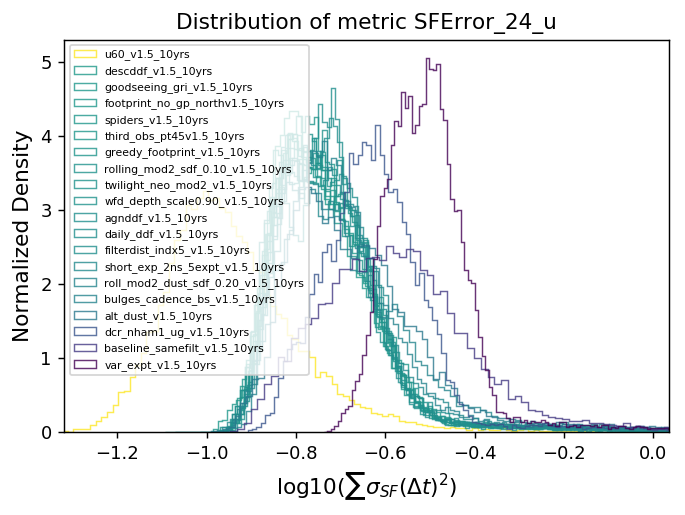

In [24]:
# loop though each metric to make plots, since some values are fairly large 
# and built in functions doesn't allow log scale

# options to provide same xlim for all metric plots
# provide a number if you want uniform xlim for all plots
xMax = None    # Set to value or None
xMin = None  # Set to value or None

# whether to save as PNGs
savefig = False

for key in bd_keys:
#     if key[1].split('_')[-1] == 'g':
        
        # get the median of metric distribution for assigning colors
        unsorted_mds = get_metric_medians(key, bundleDicts, get_median)
        sort_order = np.argsort(unsorted_mds)
        sorted_mds = np.sort(unsorted_mds)
        Norm = mpl.colors.Normalize(vmin=np.log10(sorted_mds[0]), vmax=np.log10(sorted_mds[-1]))
        runs = list(resultDbsView.keys())
        
        # placeholder for metric max and min, will used to assign plotting limit
        xmax = []
        xmin = []       
        fig = plt.figure(dpi=130)
#         for i, run in enumerate(resultDbsView):
        for order in sort_order:

            # get run_name
            run = runs[order]
            
            # look for the correct combination of metricID and metricName 
            keys = [*bundleDicts[run].keys()]
            metricKey = [elem for elem in keys if elem[1] == key[1]][0]

            # need to mask the pixels that have no available data & exclude nan/inf if exists
            mask = bundleDicts[run][metricKey].metricValues.mask
            data = bundleDicts[run][metricKey].metricValues.data[~mask]
            data = data[~(np.isnan(data) | np.isinf(data))]
            log10Data = np.log10(data)
            # plot
            _ = plt.hist(log10Data, bins='fd', histtype='step', alpha=0.8, linewidth=0.8,
                         color=mpl.cm.viridis_r(Norm(np.median(log10Data))), density=True, label=f'{run}')
            plt.xlabel('log10($\sum\\sigma_{SF}(\Delta t)^2$)', fontsize=12)
            plt.ylabel('Normalized Density', fontsize=12)
            plt.legend(fontsize=6)
            xmax.append(np.percentile(log10Data, 99))
            xmin.append(np.percentile(log10Data, 0.01))
            
        # check if uniform xlim provided
        if xMax is not None:
            plt.xlim(right=xMax)
        else:
            plt.xlim(right = np.max(xmax))
        
        if xMin is not None:
            plt.xlim(left=xMin)
        else:
            plt.xlim(left=np.min(xmin))

        plt.title(f'Distribution of metric {key[1]}', fontsize=12)
        # options to save
        if savefig:
            plt.savefig(f'Distribution of metric {key[1]}.png', dpi=200)

#### __Remark:__
From the histograms above we can see that shape of the distribution of the defined metric doesn't (or barely) depends on the magnitude of the source (22 vs 24), so it is safe to use only one magnitude to make differential comparisons in the future. 

### 3.3 SkyPlots
Show the slope uncertainty over the sky

<!-- __WY:__ Didn't find a easy way to plot healpy plot side by side, healpy takes figure as input, not axes. 
Might find better ways in the future -->

In [25]:
# function to make sky plot
import healpy as hp
def plotSky_scale(mb, scale_func=np.log10, minVal=None, maxVal=None, **kwargs):
    '''
    Plot High-Res DDF skymap. 
    Args:
        mb: MetricBundle object.
        scale_func (func): A scaling function for the metric data, e.g., np.log10
        minVal (float): Mininum value to plot
        maxVal (float): Maximum value to plot
    '''
    try:
        mbValues = mb.metricValues.copy()
        mask = mbValues.mask
        dirty_data = mbValues.data[~mask]
        data = dirty_data[~(np.isnan(dirty_data) | np.isinf(dirty_data))]
        nData = scale_func(data)
    except Exception as e:
        print(e)
        return None
    
    if maxVal is None:
        maxVal = np.percentile(nData, 99)
    if minVal is None: 
        minVal = np.percentile(nData, 1)
        
    _ = hp.mollview(scale_func(mbValues), flip='astro', max=maxVal, min=minVal, **kwargs)
    _ = hp.graticule(dpar=30, dmer=30, verbose=False)
    plt.title(f'Metric:{mb.metric.name}, RunName:{mb.runName}', fontsize=15)

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


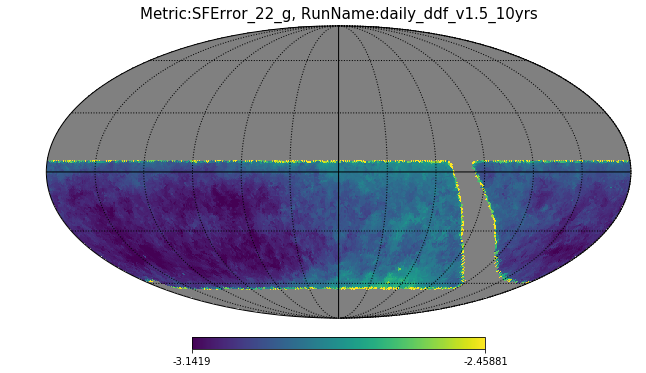

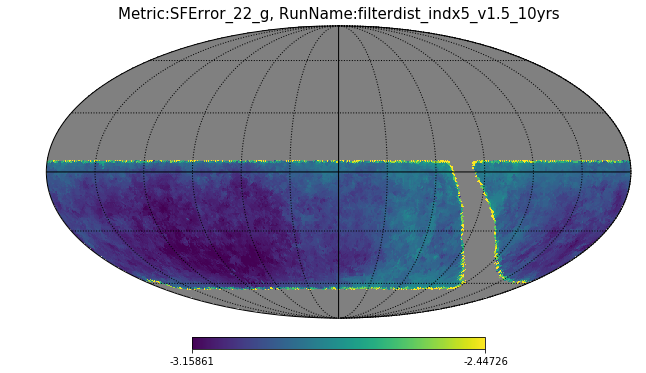

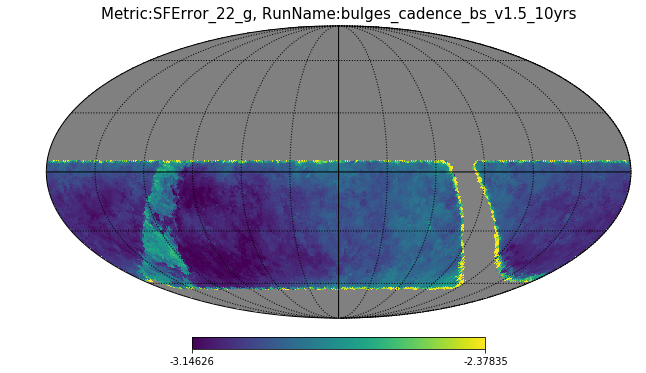

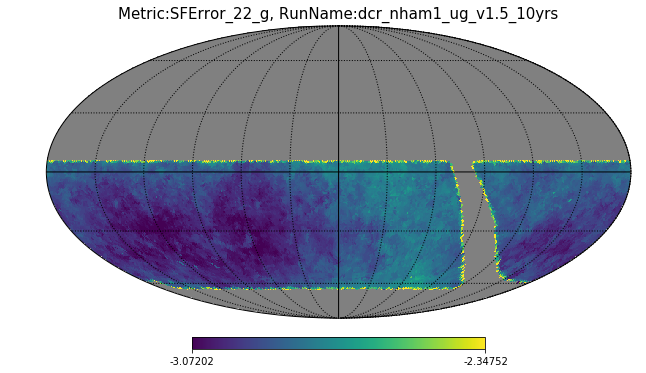

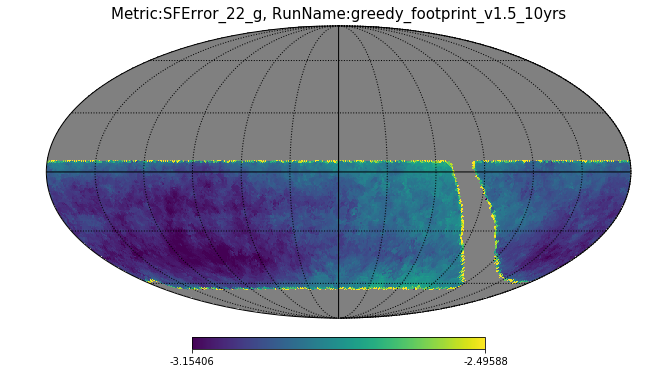

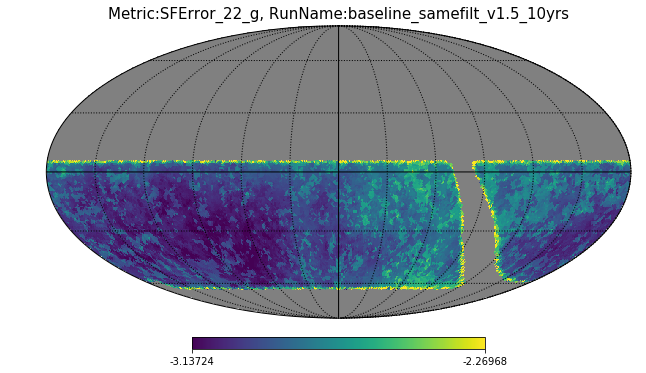

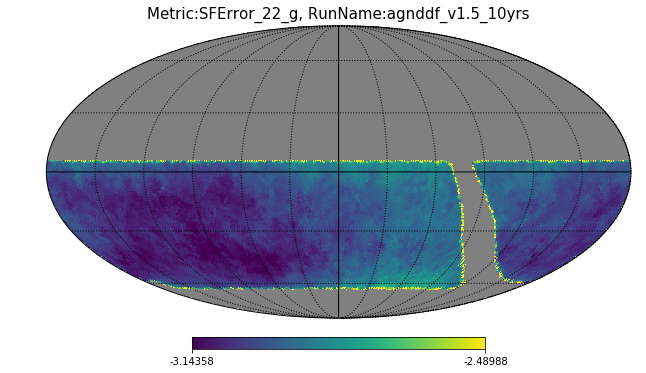

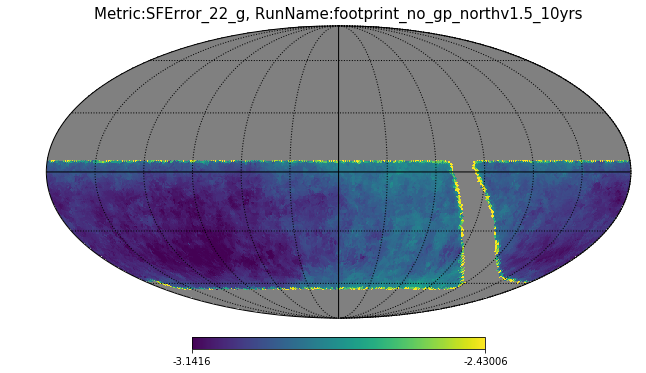

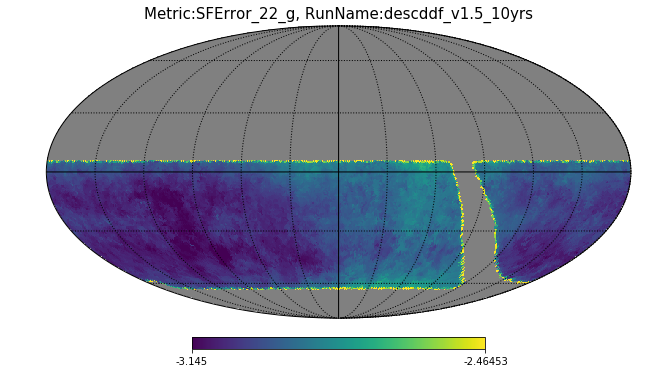

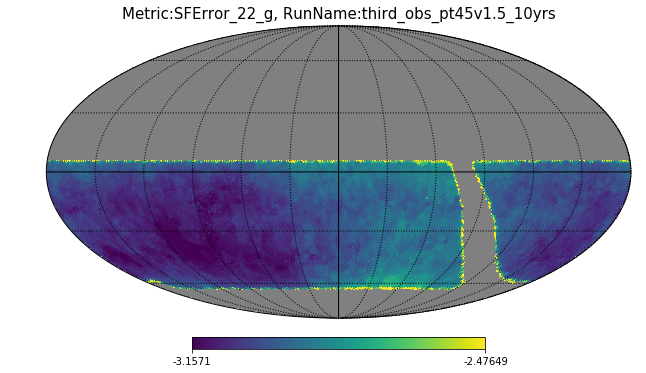

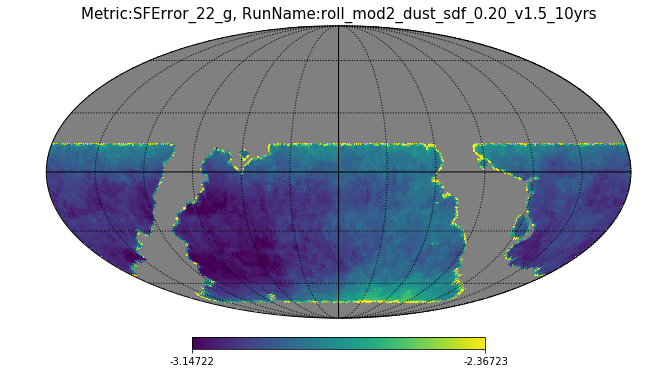

In [26]:
# only plotting first few opsims to save space
for k, run in enumerate(resultDbsView):
    if k < 11: # Make smaller to only plot a few examples
        
        # loop over the (magnitude dependent) metrics, here only 22
        for i, gmag in enumerate([22]):
            
            if i < 4:
                key = (i, f'SFError_{gmag}_g')

                # look for the correct combination of metricID and metricName 
                keys = [*bundleDicts[run].keys()]
                metricKeyG = [elem for elem in keys if elem[1] == key[1]][0]
                plotSky_scale(bundleDicts[run][metricKeyG], np.log10, maxVal=None, minVal=None) # color bar changes for each plot
#                 plotSky_scale(bundleDicts[run][metricKeyG], np.log, maxVal=-4.5, minVal=-6.5) # color bar fixed

<a id='extreme_vs_baseline'><a>
### 4. Extreme rolling vs Baseline (100 epochs)
Given the definition of this metric: $u^{2}(\mathrm{SF}) = 2*\mu_{\sigma_{i}^{2}} + 2*\sqrt{\mathrm{Var}(\sigma_{i}^{2})/n} - 2*cov(\Delta t)$, to the first order, we can assume both the mean and the variance of the square of the photometric errors do not depends on how the observations are distributed. If so, we can substitue $\mu_{\sigma_{i}^{2}}$ and $\mathrm{Var}(\sigma_{i}^{2})$ with typical (median) values evaluated over the entire sky.

__gmag = 22:__
- $\mu_{\sigma_{i}^{2}} \approx 6*10^{-4}$ 
- $\mathrm{Var}(\sigma_{i}^{2}) \approx 6*10^{-8}$

__gmag = 24:__
- $\mu_{\sigma_{i}^{2}} \approx 1.7*10^{-2}$ 
- $\mathrm{Var}(\sigma_{i}^{2}) \approx 7.17*10^{-5}$

#### Simulate Extreme Rolling and Compute $\sum u^{2}(\mathrm{SF})$

In [27]:
# define time stamps
roll_t = np.sort(np.random.uniform(0, 180, 100))

# compute delta t
dt_matrix = roll_t.reshape((1, roll_t.size)) - roll_t.reshape((roll_t.size, 1))
roll_dts = dt_matrix[dt_matrix > 0].flatten().astype(np.float16)

# make histogram
bins=np.logspace(0, np.log10(3650), 11)
roll_result, bins = np.histogram(roll_dts, bins)

# replace zero with 0.01
updated_roll_result = np.where(roll_result > 0, roll_result, 1e-2)

# compute metric; subtract 1 to normalize
roll_metric_22 = np.log10(2*10*6*1e-4 + 2*np.sqrt(6*1e-8)*np.sum(1/np.sqrt(updated_roll_result))) - 1
roll_metric_24 = np.log10(2*10*1.7*1e-2 + 2*np.sqrt(7.17*1e-5)*np.sum(1/np.sqrt(updated_roll_result))) - 1 
print(f'Extreme rolling cadence metric value at gmag == 22 in log10 scale: {roll_metric_22}')
print(f'Extreme rolling cadence metric value at gmag == 24 in log10 scale: {roll_metric_24}')

Extreme rolling cadence metric value at gmag == 22 in log10 scale: -2.5703703679498067
Extreme rolling cadence metric value at gmag == 24 in log10 scale: -1.0681293238095784


#### Simulate Vanila Baseline and Compute $\sum u^{2}(\mathrm{SF})$

In [28]:
# define time stamps
full_t = np.linspace(0, 3560, 10000)
season_t = full_t[(full_t%365.5 > 90) & (full_t%365.5 < 270)]
base_t = np.sort(np.random.choice(season_t, 100))

# compute delta t
dt_matrix = base_t.reshape((1, base_t.size)) - base_t.reshape((base_t.size, 1))
base_dts = dt_matrix[dt_matrix > 0].flatten().astype(np.float16)

# make histogram
bins=np.logspace(0, np.log10(3650), 11)
base_result, bins = np.histogram(base_dts, bins)

# replace zero with 0.01
updated_base_result = np.where(base_result > 0, base_result, 1e-2)

# compute metric; subtract 1 to normalize
base_metric_22 = np.log10(2*10*6*1e-4 + 2*np.sqrt(6*1e-8)*np.sum(1/np.sqrt(updated_base_result))) - 1 
base_metric_24 = np.log10(2*10*1.7*1e-2 + 2*np.sqrt(7.17*1e-5)*np.sum(1/np.sqrt(updated_base_result))) - 1
print(f'Baseline cadence metric value at gmag == 22 in log10 scale: {base_metric_22}')
print(f'Baseline cadence metric value at gmag == 24 in log10 scale: {base_metric_24}')

Baseline cadence metric value at gmag == 22 in log10 scale: -2.760305130048282
Baseline cadence metric value at gmag == 24 in log10 scale: -1.2794361882621923


### ----------- Stop Here -----------------

#### First Version of SF Error Derivation (for reference):
$u^{2}(\mathrm{SF^{2}}) = 2*\mathrm{SF^{2}}[u^{2}(\mathrm{SF}) + 1]$

$\quad\quad\quad = \frac{1}{n} \sum u^{2}[(m_{i} - m_{j})^{2}]$

$\quad\quad\quad = \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[u^{2}(m_{i} - m_{j}) + 1]$

$\quad\quad\quad = \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[u^{2}(m_{i}) + u^{2}(m_{j}) - 2*cov(\Delta t)+ 1]$

$\quad\quad\quad = \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[{\sigma}_{i}^{2} + {\sigma}_{j}^{2} - 2*cov(\Delta t) + 1]$ ($\sigma$ is the photometric error; $cov(\Delta t)$ is the covariance. )

$\quad\quad\quad \approx \frac{1}{n} \sum 2*\ (m_{i} - m_{j})^{2}\,[2*\overline{{\sigma}_{i}^{2}} - 2*cov(\Delta t)+ 1]$ (assuming the photometric error doesn't vary too much, so $\overline{{\sigma}_{i}^{2}}$ is just the sample mean)

$\quad\quad\quad = 2*\mathrm{SF}^{2}\,[2*\overline{{\sigma}_{i}^{2}} - 2*cov(\Delta t)+ 1]$

=> $[u^{2}(\mathrm{SF}) + 1] = [2*\overline{{\sigma}_{i}^{2}} - 2*cov(\Delta t)+ 1]$

=> $u^{2}(\mathrm{SF}) = 2*\overline{{\sigma}_{i}^{2}} - 2*cov(\Delta t)$

This looks fine but not ideal. We would expect the uncertainty to scale with the number of pairs ($n$), that is the larger the value $n$ the smaller the uncertainly in $\mathrm{SF}$. We might have left something out. One possible place is where I approximate ${\sigma}_{i}^{2} \approx \overline{{\sigma}_{i}^{2}}$. Given the average is only the sample mean, there are some intrinsic variance in the mean, where the variance scales as $\frac{1}{n}$. We can recover that variance by using the population mean obtained by averaging all observations instead of just those at the particular $\Delta t$ bin at which the $\mathrm{SF}$ is evaluated. Thus, we have ${\sigma}_{i}^{2} \approx \mu_{\sigma^{2}} + \sqrt{\mathrm{Var}(\sigma_{i}^{2})/n}$ (This is indeed not precise even correct, but should provide a way to allow us making differential comparisons between cadences). 